# Cleaning Preprocessing, and EDA

This notebook goes through the cleaning the data from the two scraped datasets and getting them to a usable format. The two datasets will the be joined to give information on each fighter for each fight. 

During this process, I will convert data types, handle missing values, inconsistencies, outliers, and irrelevant variables. The aim is to create a structured, consistent, and easy-to-understand dataset.

I will also carry out elements of EDA, extracting some initial insights from the dataset.

---

In [429]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import ds_tools
import numpy as np
from scipy.stats import linregress

In [430]:
# Load fight data
pd.set_option('display.max_columns', None)
fights_df = pd.read_csv('data/raw/fight_data.csv', index_col=0)
fights_df.head()

,Date,Winner,Method,Referee,Format,Weight_class,W_round,W_round_time,R_fighter,B_fighter,R_KD,B_KD,R_total_str,B_total_str,R_TD,B_TD,R_sub_att,B_sub_att,R_rev,B_rev,R_ctrl,B_ctrl,R_sig_str,B_sig_str,R_sig_str_head,B_sig_str_head,R_sig_str_body,B_sig_str_body,R_sig_str_leg,B_sig_str_leg,R_sig_str_dist,B_sig_str_dist,R_sig_str_clinch,B_sig_str_clinch,R_sig_str_ground,B_sig_str_ground,Fight_link,R_link,B_link
0,"Dec. 04, 2010",Matt Ricehouse,Decision - Unanimous,NaN,3 Rnd (5-5-5),Lightweight Bout,3,5:00,Tom Aaron,Matt Ricehouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://ufcstats.com/fight-details/9be14b958737f074,http://ufcstats.com/fighter-details/93fe7332d16c6ad9,http://ufcstats.com/fighter-details/343d57cde1a14338
1,"May. 15, 2010",Tom Aaron,Submission,Al Wichgers,3 Rnd (5-5-5),Catch Weight Bout,1,0:56,Tom Aaron,Eric Steenberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://ufcstats.com/fight-details/bcb38a9d29822d3d,http://ufcstats.com/fighter-details/93fe7332d16c6ad9,http://ufcstats.com/fighter-details/377bc9dc0b2745f9
2,"Sep. 23, 2006",Jorge Gurgel,Decision - Split,Herb Dean,3 Rnd (5-5-5),Lightweight Bout,3,5:00,Jorge Gurgel,Danny Abbadi,0.0,0.0,101 of 208,79 of 173,1 of 7,0 of 0,1.0,0.0,0.0,0.0,2:03,1:50,58 of 159,56 of 146,49 of 149,49 of 137,6 of 7,7 of 9,3 of 3,0 of 0,44 of 128,41 of 122,12 of 18,12 of 20,2 of 13,3 of 4,http://ufcstats.com/fight-details/38231925d72d1309,http://ufcstats.com/fighter-details/04d5718ed2661e8c,http://ufcstats.com/fighter-details/15df64c02b6b0fde
3,"Jun. 24, 2006",Kalib Starnes,Submission,Mario Yamasaki,3 Rnd (5-5-5),Middleweight Bout,1,2:56,Kalib Starnes,Danny Abbadi,0.0,0.0,25 of 33,6 of 12,1 of 2,0 of 0,1.0,0.0,0.0,0.0,1:41,0:00,21 of 29,3 of 9,10 of 17,2 of 8,11 of 12,1 of 1,0 of 0,0 of 0,2 of 5,1 of 5,5 of 5,2 of 4,14 of 19,0 of 0,http://ufcstats.com/fight-details/387bdcc2ca8709c1,http://ufcstats.com/fighter-details/c8136ab8aa32c974,http://ufcstats.com/fighter-details/15df64c02b6b0fde
4,"Sep. 06, 2022",Ismael Bonfim,Decision - Unanimous,Herb Dean,3 Rnd (5-5-5),Lightweight Bout,3,5:00,Ismael Bonfim,Nariman Abbasov,1.0,0.0,85 of 158,45 of 225,1 of 3,0 of 2,0.0,0.0,0.0,0.0,0:06,0:21,85 of 158,45 of 225,63 of 133,26 of 197,19 of 21,8 of 11,3 of 4,11 of 17,77 of 144,45 of 224,5 of 7,0 of 1,3 of 7,0 of 0,http://ufcstats.com/fight-details/ce99b089400a4ad3,http://ufcstats.com/fighter-details/eb393afdbe3293d5,http://ufcstats.com/fighter-details/59a9d6dac61c2540


In [431]:
ds_tools.basic_checks(fights_df)

==================== SHAPE ====================
Rows: 19096
Columns: 39

==================== NULLS ====================
Nulls: 18988 null values
Rows with nulls: 1220, 6.39% of the DataFrame

Nulls percentage (by column):
Winner             1.037%
Referee            3.090%
R_KD               3.666%
B_KD               3.666%
R_total_str        3.666%
B_total_str        3.666%
R_TD               3.666%
B_TD               3.666%
R_sub_att          3.666%
B_sub_att          3.666%
R_rev              3.666%
B_rev              3.666%
R_ctrl             3.666%
B_ctrl             3.666%
R_sig_str          3.666%
B_sig_str          3.666%
R_sig_str_head     3.666%
B_sig_str_head     3.666%
R_sig_str_body     3.666%
B_sig_str_body     3.666%
R_sig_str_leg      3.666%
B_sig_str_leg      3.666%
R_sig_str_dist     3.666%
B_sig_str_dist     3.666%
R_sig_str_clinch   3.666%
B_sig_str_clinch   3.666%
R_sig_str_ground   3.666%
B_sig_str_ground   3.666%
Total nulls percentage: 2.55%

==================

Looking at the dataframe above, we can see that there are relatively few null values in only the `Winner` and `Referee` columns. Taking a look at the nulls in the `Winner` column below, we can see that these fights were ruled as 'No Contest'. That is, a result was not declared due to an accidental injury, or overturned. We will drop these rows as they are anomalous events.

We can also see that there are exactly 50% of the rows which are duplicates. This is due to the fact that the scraper goes through the fights of every single fighteer, so every fight is represented twice. We will drop these duplicates.

In [432]:
fights_df.drop_duplicates(inplace=True)

In [433]:
# View nulls in 'Winner'
fights_df[fights_df['Winner'].isna()]

,Date,Winner,Method,Referee,Format,Weight_class,W_round,W_round_time,R_fighter,B_fighter,R_KD,B_KD,R_total_str,B_total_str,R_TD,B_TD,R_sub_att,B_sub_att,R_rev,B_rev,R_ctrl,B_ctrl,R_sig_str,B_sig_str,R_sig_str_head,B_sig_str_head,R_sig_str_body,B_sig_str_body,R_sig_str_leg,B_sig_str_leg,R_sig_str_dist,B_sig_str_dist,R_sig_str_clinch,B_sig_str_clinch,R_sig_str_ground,B_sig_str_ground,Fight_link,R_link,B_link
5,"Jul. 30, 2022",NaN,Overturned,Kerry Hatley,3 Rnd (5-5-5),Heavyweight Bout,3,5:00,Don'Tale Mayes,Hamdy Abdelwahab,0.0,1.0,54 of 123,106 of 164,0 of 0,3 of 4,0.0,0.0,0.0,0.0,0:00,6:36,47 of 116,58 of 110,28 of 90,51 of 102,12 of 17,5 of 6,7 of 9,2 of 2,45 of 111,30 of 74,2 of 5,2 of 3,0 of 0,26 of 33,http://ufcstats.com/fight-details/5a2b86570110191b,http://ufcstats.com/fighter-details/1a9480fc288e55d7,http://ufcstats.com/fighter-details/3329d692aea4dc28
50,"May. 30, 2020",NaN,Overturned,Herb Dean,3 Rnd (5-5-5),Light Heavyweight Bout,1,1:51,Jamahal Hill,Klidson Abreu,2.0,0.0,14 of 24,5 of 7,0 of 0,0 of 0,0.0,0.0,0.0,0.0,0:02,0:00,14 of 24,5 of 7,9 of 19,0 of 2,4 of 4,1 of 1,1 of 1,4 of 4,9 of 18,4 of 6,2 of 2,1 of 1,3 of 4,0 of 0,http://ufcstats.com/fight-details/0fcf42b68f2f0fa3,http://ufcstats.com/fighter-details/5444c5a201d3ee5a,http://ufcstats.com/fighter-details/7279654c7674cd24
116,"May. 15, 2009",NaN,Overturned,Herb Dean,3 Rnd (5-5-5),Lightweight Bout,2,3:42,Mike Aina,Billy Evangelista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://ufcstats.com/fight-details/cb640b7dcc9db7e8,http://ufcstats.com/fighter-details/9e3dbb9c68ed5d1a,http://ufcstats.com/fighter-details/9766ed20b68c7c33
156,"Dec. 31, 2007",NaN,Overturned,Daisuke Noguchi,2 Rnd (10-5),Middleweight Bout,1,7:48,Yoshihiro Akiyama,Kazuo Misaki,1.0,1.0,36 of 76,33 of 77,0 of 0,0 of 0,0.0,0.0,0.0,0.0,--,--,31 of 70,33 of 77,21 of 49,7 of 38,1 of 7,4 of 10,9 of 14,22 of 29,25 of 60,31 of 74,0 of 0,1 of 2,6 of 10,1 of 1,http://ufcstats.com/fight-details/96c5470d4dbc39fb,http://ufcstats.com/fighter-details/b0550072e5f0afa7,http://ufcstats.com/fighter-details/5e7a28f20927d64a
158,"Dec. 31, 2006",NaN,Overturned,Yoshinori Umeki,3 Rnd (10-5-5),Catch Weight Bout,1,5:37,Yoshihiro Akiyama,Kazushi Sakuraba,0.0,0.0,72 of 116,6 of 26,0 of 0,0 of 3,0.0,0.0,0.0,0.0,--,--,30 of 54,6 of 26,26 of 49,2 of 11,0 of 1,2 of 5,4 of 4,2 of 10,10 of 20,5 of 23,5 of 9,1 of 3,15 of 25,0 of 0,http://ufcstats.com/fight-details/1216446c6ad271e7,http://ufcstats.com/fighter-details/b0550072e5f0afa7,http://ufcstats.com/fighter-details/9b5b5a75523728f3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15842,"Jan. 01, 2011",NaN,Overturned,Steve Mazzagatti,3 Rnd (5-5-5),Light Heavyweight Bout,3,5:00,Brandon Vera,Thiago Silva,0.0,0.0,27 of 53,145 of 213,0 of 0,3 of 3,0.0,1.0,0.0,0.0,0:24,12:53,19 of 44,51 of 100,5 of 22,36 of 82,7 of 12,12 of 14,7 of 10,3 of 4,12 of 29,7 of 26,7 of 14,7 of 10,0 of 1,37 of 64,http://ufcstats.com/fight-details/65b4d4be2d04bb34,http://ufcstats.com/fighter-details/fa315e6c77eee106,http://ufcstats.com/fighter-details/2924886ee9c4c527
16169,"Feb. 28, 2015",NaN,Could Not Continue,John McCarthy,3 Rnd (5-5-5),Bantamweight Bout,2,2:37,Roman Salazar,Norifumi Yamamoto,0.0,0.0,19 of 53,19 of 49,1 of 2,0 of 0,0.0,0.0,0.0,0.0,0:10,0:00,16 of 49,19 of 49,12 of 43,12 of 40,2 of 4,1 of 3,2 of 2,6 of 6,14 of 46,17 of 46,2 of 3,2 of 3,0 of 0,0 of 0,http://ufcstats.com/fight-details/28255055879685bc,http://ufcstats.com/fighter-details/72c4b253d2f5ebf2,http://ufcstats.com/fighter-details/4834ff149dc9542a
16322,"Oct. 31, 2000",NaN,Could Not Continue,Akira Okabayashi,2 Rnd (10-10),Open Weight Bout,1,0:21,Wanderlei Silva,Gilbert Yvel,0.0,0.0,1 of 2,1 of 3,0 of 0,0 of 0,0.0,0.0,0.0,0.0,--,--,1 of 2,1 of 3,0 of 1,0 of 2,0 of 0,0 of 0,1 of 1,1 of 1,1 of 2,1 of 3,0 of 0,0 of 0,0 of 0,0 of 0,http://ufcstats.com/fight-details/2e4

In [434]:
# Checking reason for nulls
fights_df[fights_df['Winner'].isna()]['Method'].value_counts()

Method
Overturned            62
Could Not Continue    35
Other                  1
KO/TKO                 1
Name: count, dtype: int64

In [435]:
# Drop rows with nulls in 'Winner'
fights_df.dropna(subset='Winner', inplace=True)

We will simply drop the entire `Referee` column as this is unlikely to have a particulary significant effect on the outcome of the fights. The high number of referees also risks excessively high level of dimensionality when encoding.

In [436]:
# Drop 'Referee' column
fights_df.drop(columns='Referee', inplace=True)

Looking first at the `Format` column, we can extract the number of rounds fought simply by splitting on the '-' character and counting the elements.

In [437]:
fights_df['Format'].value_counts()

Format
3 Rnd (5-5-5)           7614
5 Rnd (5-5-5-5-5)        732
2 Rnd (10-5)             307
3 Rnd (10-5-5)           291
1 Rnd + OT (12-3)         87
3 Rnd + OT (5-5-5-5)      71
2 Rnd (10-10)             61
3 Rnd (3-3-3)             58
No Time Limit             41
2 Rnd (5-5)               39
1 Rnd (20)                27
1 Rnd (15)                23
3 Rnd (10-10-10)          22
1 Rnd + 2OT (15-3-3)      20
3 Rnd (4-4-4)              9
1 Rnd (10)                 8
1 Rnd (12)                 6
3 Rnd (10-10-5)            5
1 Rnd + OT (30-5)          3
2 Rnd (3-3)                3
5 Rnd (3-3-3-3-3)          2
1 Rnd (18)                 2
1 Rnd + OT (15-3)          2
1 Rnd (30)                 2
Unlimited Rnd  (15)        2
1 Rnd + OT (15-10)         2
4 Rnd (10-10-10-10)        1
1 Rnd + OT (30-3)          1
1 Rnd + OT (27-3)          1
5 Rnd (4-4-4-4-4)          1
3 Rnd (2-2-2)              1
Unlimited Rnd (10)         1
1 Rnd + OT (31-5)          1
3 Rnd (8-8-8)              1
Unlimit

In [438]:
fights_df['N_Rounds'] = [len(x.split('-')) for x in fights_df['Format']]

Next we will look at any temporal columns. These are `Date`, `W_round_time`, `R_ctrl`, and `B_ctrl`. The `Date` column can simply be converted to a `datetime` object with `pd.to_datetime`. 

The `W_round_time` and control time columns will be converted to seconds by fist converting to `timedelta` objects and then extracting the seconds. But first, any rows where no time is present has a value of `--`. These must be reassigned `0:00`. an additional `00:` must also be placed at the start of the string to represent the number of hours as is expected by `pd.to_timedelta`. Once this is done, the column can be converted.

In [439]:
# Convert 'Date' to datetime object
fights_df['Date'] = pd.to_datetime(fights_df['Date'])

# Convert to timdelta object
for col in ['W_round_time', 'R_ctrl', 'B_ctrl']:
    # Reassign 0 time values
    fights_df[col] = fights_df[col].replace('--', '0:00')
    
    # Add 00: hours and convert
    fights_df[col] = pd.to_timedelta('00:' + fights_df[col]).dt.seconds

We can then use the `W_round_time` column in combination with values extracted from the `Format` column to find the total fight time.

In [440]:
# Define a function to calculate the fight time in seconds based on fight format and fight details
def calc_fight_time(row):
    # Extract fight format details
    format_info = row['Format']

    # Handle 'No Time Limit' fights
    if format_info == 'No Time Limit':
        return row['W_round_time']

    # Handle 'Unlimited Rnd' fights
    if 'Unlimited' in format_info:
        # Extract round duration from fight format
        round_duration = int(format_info.split(' ')[-1][1:-1])
        # Calculate total fight time
        return (row['W_round'] - 1) * 60 * round_duration + row['W_round_time']

    # Handle regular fights with round duration specified in the format
    # Split the round duration from fight format
    round_durations = [int(x) for x in format_info.split(' ')[-1][1:-1].split('-')]
    # Calculate total fight time by summing product of number of rounds and respective round duration
    return sum(round_duration * 60 for round_duration in round_durations[:row['W_round']]) + row['W_round_time']

# Apply the function to each row in the dataframe to create the new 'total_fight_time' column
fights_df['Fight_time'] = fights_df.apply(calc_fight_time, axis=1)


We can now drop the `Format` column since it is no longer needed

In [441]:
fights_df.drop(columns='Format', inplace=True)

The striking stats for each fighter are strings in the format of `x of y` where `x` is the number of strikes landed and `y` is the number attempted. These will be separated into `numeric` columns representing attempted and landed stats.

In [442]:
fights_df.select_dtypes('object').columns[5:-3]

Index(['R_total_str', 'B_total_str', 'R_TD', 'B_TD', 'R_sig_str', 'B_sig_str',
       'R_sig_str_head', 'B_sig_str_head', 'R_sig_str_body', 'B_sig_str_body',
       'R_sig_str_leg', 'B_sig_str_leg', 'R_sig_str_dist', 'B_sig_str_dist',
       'R_sig_str_clinch', 'B_sig_str_clinch', 'R_sig_str_ground',
       'B_sig_str_ground'],
      dtype='object')

In [443]:
# Select relevant columns
for col in fights_df.select_dtypes('object').columns[5:-3]:

    # Split the string to acquire values
    splitted = fights_df[col].apply(lambda x: x.split(' of ') if pd.notnull(x) else [None, None])

    # Extract numerical value and create new columns representing attempted and landed strikes
    fights_df[col + '_att'] = splitted.apply(lambda x: int(x[1]) if x[1] is not None else x[1])
    fights_df[col + '_land'] = splitted.apply(lambda x: int(x[0]) if x[1] is not None else x[0])

    # Drop original categorical column
    fights_df.drop(columns=col, inplace=True)

In [444]:
fights_df.head()

,Date,Winner,Method,Weight_class,W_round,W_round_time,R_fighter,B_fighter,R_KD,B_KD,R_sub_att,B_sub_att,R_rev,B_rev,R_ctrl,B_ctrl,Fight_link,R_link,B_link,N_Rounds,Fight_time,R_total_str_att,R_total_str_land,B_total_str_att,B_total_str_land,R_TD_att,R_TD_land,B_TD_att,B_TD_land,R_sig_str_att,R_sig_str_land,B_sig_str_att,B_sig_str_land,R_sig_str_head_att,R_sig_str_head_land,B_sig_str_head_att,B_sig_str_head_land,R_sig_str_body_att,R_sig_str_body_land,B_sig_str_body_att,B_sig_str_body_land,R_sig_str_leg_att,R_sig_str_leg_land,B_sig_str_leg_att,B_sig_str_leg_land,R_sig_str_dist_att,R_sig_str_dist_land,B_sig_str_dist_att,B_sig_str_dist_land,R_sig_str_clinch_att,R_sig_str_clinch_land,B_sig_str_clinch_att,B_sig_str_clinch_land,R_sig_str_ground_att,R_sig_str_ground_land,B_sig_str_ground_att,B_sig_str_ground_land
0,2010-12-04,Matt Ricehouse,Decision - Unanimous,Lightweight Bout,3,300,Tom Aaron,Matt Ricehouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://ufcstats.com/fight-details/9be14b958737f074,http://ufcstats.com/fighter-details/93fe7332d16c6ad9,http://ufcstats.com/fighter-details/343d57cde1a14338,3,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-05-15,Tom Aaron,Submission,Catch Weight Bout,1,56,Tom Aaron,Eric Steenberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://ufcstats.com/fight-details/bcb38a9d29822d3d,http://ufcstats.com/fighter-details/93fe7332d16c6ad9,http://ufcstats.com/fighter-details/377bc9dc0b2745f9,3,356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-09-23,Jorge Gurgel,Decision - Split,Lightweight Bout,3,300,Jorge Gurgel,Danny Abbadi,0.0,0.0,1.0,0.0,0.0,0.0,123.0,110.0,http://ufcstats.com/fight-details/38231925d72d1309,http://ufcstats.com/fighter-details/04d5718ed2661e8c,http://ufcstats.com/fighter-details/15df64c02b6b0fde,3,1200,208.0,101.0,173.0,79.0,7.0,1.0,0.0,0.0,159.0,58.0,146.0,56.0,149.0,49.0,137.0,49.0,7.0,6.0,9.0,7.0,3.0,3.0,0.0,0.0,128.0,44.0,122.0,41.0,18.0,12.0,20.0,12.0,13.0,2.0,4.0,3.0
3,2006-06-24,Kalib Starnes,Submission,Middleweight Bout,1,176,Kalib Starnes,Danny Abbadi,0.0,0.0,1.0,0.0,0.0,0.0,101.0,0.0,http://ufcstats.com/fight-details/387bdcc2ca8709c1,http://ufcstats.com/fighter-details/c8136ab8aa32c974,http://ufcstats.com/fighter-details/15df64c02b6b0fde,3,476,33.0,25.0,12.0,6.0,2.0,1.0,0.0,0.0,29.0,21.0,9.0,3.0,17.0,10.0,8.0,2.0,12.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,5.0,1.0,5.0,5.0,4.0,2.0,19.0,14.0,0.0,0.0
4,2022-09-06,Ismael Bonfim,Decision - Unanimous,Lightweight Bout,3,300,Ismael Bonfim,Nariman Abbasov,1.0,0.0,0.0,0.0,0.0,0.0,6.0,21.0,http://ufcstats.com/fight-details/ce99b089400a4ad3,http://ufcstats.com/fighter-details/eb393afdbe3293d5,http://ufcstats.com/fighter-details/59a9d6dac61c2540,3,1200,158.0,85.0,225.0,45.0,3.0,1.0,2.0,0.0,158.0,85.0,225.0,45.0,133.0,63.0,197.0,26.0,21.0,19.0,11.0,8.0,4.0,3.0,17.0,11.0,144.0,77.0,224.0,45.0,7.0,5.0,1.0,0.0,7.0,3.0,0.0,0.0


In [445]:
fights_df.reset_index(drop=True, inplace=True)

We can also relabel the `Winner` column to show whether the the red or blue corner is the winner.

In [446]:
fights_df.loc[8586]

Date                                                      2006-07-28 00:00:00
Winner                                                               Jonathan
Method                                                             Submission
Weight_class                                                Welterweight Bout
W_round                                                                     3
W_round_time                                                              227
R_fighter                                                      Jonathan  Mix 
B_fighter                                                       Mario Rivera 
R_KD                                                                      NaN
B_KD                                                                      NaN
R_sub_att                                                                 NaN
B_sub_att                                                                 NaN
R_rev                                                           

In [447]:
# Select the string columns and strip whitespace from them
for col in fights_df.select_dtypes(['object']).columns:
    fights_df[col] = fights_df[col].str.strip()

In [448]:
win_enc = []
for i in range(len(fights_df)):
    if fights_df['Winner'][i] in fights_df['R_fighter'][i]:
        win_enc.append('R')
    elif fights_df['Winner'][i] in fights_df['B_fighter'][i]:
        win_enc.append('B')
    else:
        win_enc.append('Draw')
fights_df['Winner'] = win_enc

As expected, the number of draws in extremely low as these are unlikely events. But interestingly, the number of red wins is significantly higher than blue wins. This was found to be the case as the 'favourite' fighter is typically assigned the red corner, and the 'underdog', blue.

Winner
R       6628
B       2747
Draw      74
Name: count, dtype: int64


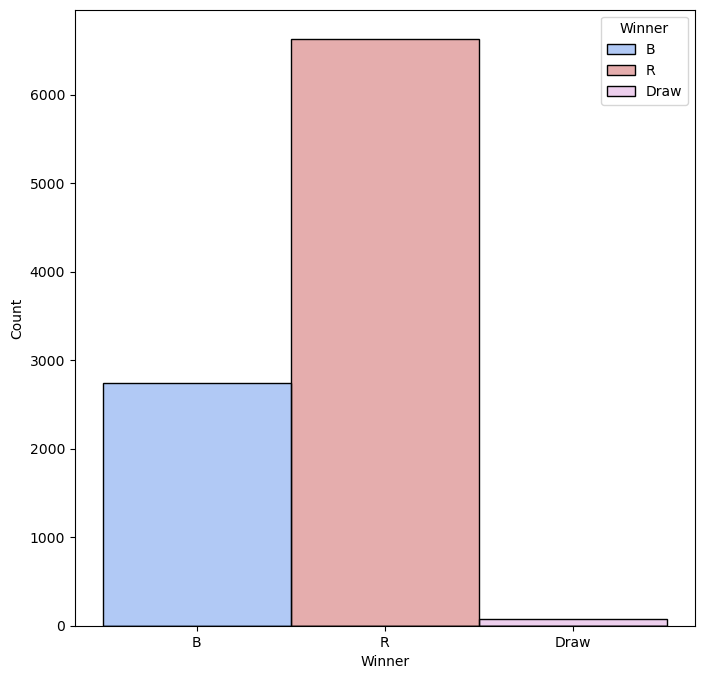

In [449]:
print(fights_df['Winner'].value_counts())
plt.figure(figsize=(8,8))
colours = {'R': 'indianred', 'B': 'cornflowerblue', 'Draw': 'plum'}

sns.histplot(data=fights_df, x='Winner', hue='Winner', palette=colours)
plt.show()

Next, we will tidy the weight classes column by extracting the words representing the class from the string in this column.

In [450]:
fights_df['Weight_class'].value_counts()

Weight_class
Lightweight Bout                                              1525
Welterweight Bout                                             1424
Middleweight Bout                                             1240
Heavyweight Bout                                               902
Featherweight Bout                                             831
                                                              ... 
Ultimate Fighter 1 Light Heavyweight Tournament Title Bout       1
UFC 14 Heavyweight Tournament Title Bout                         1
Ultimate Fighter 3 Light Heavyweight Tournament Title Bout       1
Ultimate Fighter 14 Featherweight Tournament Title Bout          1
Ultimate Japan Heavyweight Tournament Title Bout                 1
Name: count, Length: 157, dtype: int64

In [451]:
# Get a set of unique weight classes
classes = np.sort(pd.Series([x.split('Bout')[0].strip() for x in fights_df['Weight_class'] if len(x.split('Bout')[0].strip().split(' ')) < 3]).unique())

In [452]:
classes=classes[1:]

In [453]:
for n in classes:
    print(n)

Bantamweight
Catch Weight
Featherweight
Flyweight
Heavyweight
Light Heavyweight
Lightweight
Middleweight
Open Weight
Super Heavyweight
Welterweight
Women's Atomweight
Women's Bantamweight
Women's Featherweight
Women's Flyweight
Women's Strawweight


In [454]:
def get_weight_class(str):
    w_class = None
    # For each weight class
    for class_ in classes:
        # If it is present in the string
        if class_ in str:
            # Reassign value to that weight class
            w_class =  class_
    if w_class == None:
        # If there are no matches, the fight was an open weigh bout
        w_class =  'Open Weight'
    return w_class

# Apply function to the column
fights_df['Weight_class'] = fights_df['Weight_class'].apply(get_weight_class)

# Check for remaining nulls
fights_df['Weight_class'].isna().sum()


0

We can see that the vast majority of fights happen at Lightweight, Welterweight, and Middleweight. These classes represent a weight range of ~70kg to ~84kg. This is likely representative of the high number of fighters in these weight groups which in turn is related to a large portion of the human population being between these weights.

The low number of Women's fights are simply due to the unfortunatley lower popularity of women's sports.

We will bin the Open Weight and Super Heavyweight fights into Heavyweight as these classes are no longer present in the UFC.

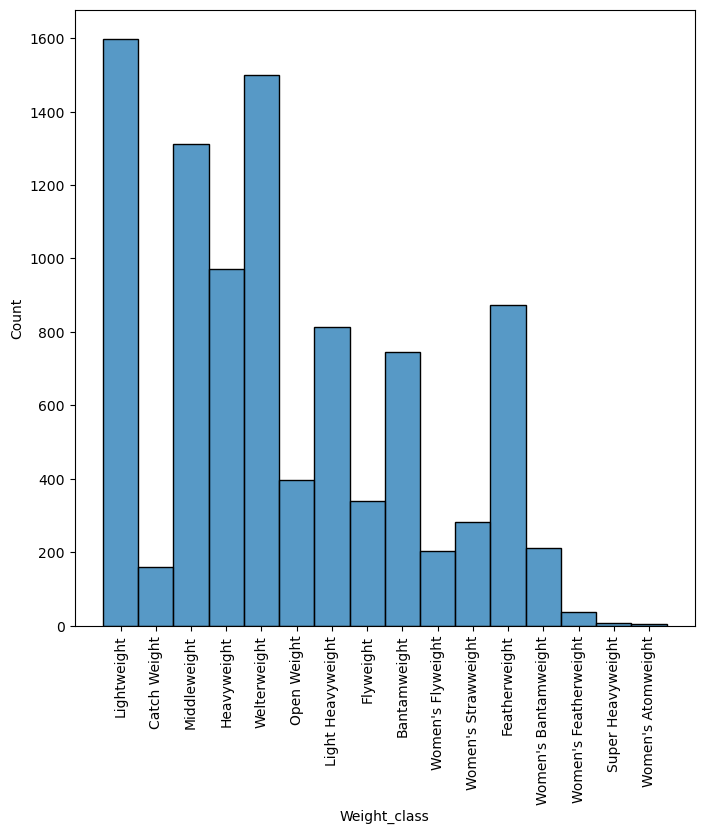

In [455]:
plt.figure(figsize=(8,8))
sns.histplot(data=fights_df, x='Weight_class')
plt.xticks(rotation = 90)
plt.show()

Looking at the `method` column, we can see that most fights are won by either unanimous decision or KO. We also notice that there are 2 fights where the method is 'other'. We will have a closer look at those.

Method
Decision - Unanimous       3122
KO/TKO                     3105
Submission                 2084
Decision - Split            849
TKO - Doctor's Stoppage     141
Decision - Majority          98
DQ                           31
Other                        14
Decision                      3
Could Not Continue            2
Name: count, dtype: int64


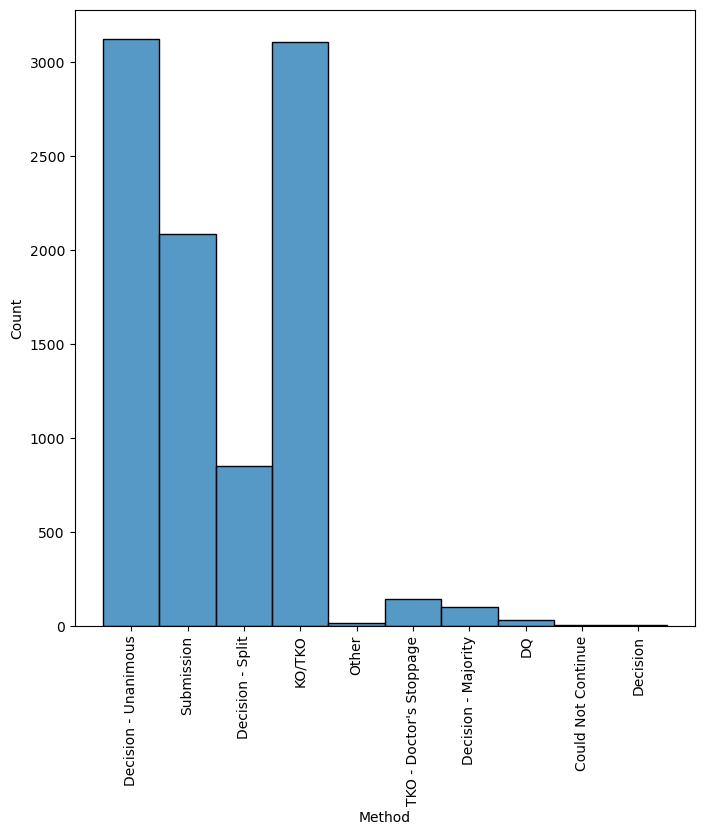

In [456]:
print(fights_df['Method'].value_counts())
plt.figure(figsize=(8,8))
sns.histplot(data=fights_df, x='Method')
plt.xticks(rotation = 90)
plt.show()

The fights where the `Method` is listed as 'Other' are mostly draws. We will class these as 'Decision'.

We will also bin all `Method` classes into KO, Sub, or Dec.

In [457]:
fights_df[fights_df['Method']=='Other']

,Date,Winner,Method,Weight_class,W_round,W_round_time,R_fighter,B_fighter,R_KD,B_KD,R_sub_att,B_sub_att,R_rev,B_rev,R_ctrl,B_ctrl,Fight_link,R_link,B_link,N_Rounds,Fight_time,R_total_str_att,R_total_str_land,B_total_str_att,B_total_str_land,R_TD_att,R_TD_land,B_TD_att,B_TD_land,R_sig_str_att,R_sig_str_land,B_sig_str_att,B_sig_str_land,R_sig_str_head_att,R_sig_str_head_land,B_sig_str_head_att,B_sig_str_head_land,R_sig_str_body_att,R_sig_str_body_land,B_sig_str_body_att,B_sig_str_body_land,R_sig_str_leg_att,R_sig_str_leg_land,B_sig_str_leg_att,B_sig_str_leg_land,R_sig_str_dist_att,R_sig_str_dist_land,B_sig_str_dist_att,B_sig_str_dist_land,R_sig_str_clinch_att,R_sig_str_clinch_land,B_sig_str_clinch_att,B_sig_str_clinch_land,R_sig_str_ground_att,R_sig_str_ground_land,B_sig_str_ground_att,B_sig_str_ground_land
19,2006-08-27,Draw,Other,Lightweight,2,300,Hiroyuki Abe,Naoki Matsushita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://ufcstats.com/fight-details/2de50e21c8f32761,http://ufcstats.com/fighter-details/c0ed7b208197e8de,http://ufcstats.com/fighter-details/990060b2a68a7b82,2,900,73.0,34.0,114.0,41.0,0.0,0.0,1.0,1.0,60.0,22.0,101.0,33.0,50.0,15.0,84.0,22.0,2.0,2.0,10.0,6.0,8.0,5.0,7.0,5.0,60.0,22.0,92.0,28.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,1.0
4440,2002-04-28,Draw,Other,Open Weight,5,180,Wanderlei Silva,Mirko Filipovic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://ufcstats.com/fight-details/4d04b0b1be893cdc,http://ufcstats.com/fighter-details/a1f6999fe57236e0,http://ufcstats.com/fighter-details/c32fb8c0f6471a4d,5,1080,137.0,48.0,38.0,16.0,5.0,3.0,0.0,0.0,103.0,21.0,33.0,11.0,72.0,14.0,19.0,0.0,6.0,4.0,9.0,8.0,25.0,3.0,5.0,3.0,73.0,11.0,31.0,10.0,9.0,4.0,1.0,1.0,21.0,6.0,1.0,0.0
4442,2001-11-03,Draw,Other,Heavyweight,5,180,Mirko Filipovic,Nobuhiko Takada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://ufcstats.com/fight-details/3ef54c5d70035533,http://ufcstats.com/fighter-details/c32fb8c0f6471a4d,http://ufcstats.com/fighter-details/a25b71fe5e31fa97,5,1080,46.0,33.0,22.0,11.0,0.0,0.0,9.0,1.0,20.0,9.0,10.0,3.0,9.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,11.0,7.0,7.0,3.0,7.0,2.0,10.0,3.0,1.0,0.0,0.0,0.0,12.0,7.0,0.0,0.0
5055,1998-10-11,Draw,Other,Open Weight,3,600,Kazushi Sakuraba,Allan Goes,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,http://ufcstats.com/fight-details/4b8678a16441dbe1,http://ufcstats.com/fighter-details/9b5b5a75523728f3,http://ufcstats.com/fighter-details/e62b36885ecdac27,3,2400,58.0,45.0,162.0,125.0,4.0,3.0,3.0,2.0,17.0,11.0,20.0,5.0,6.0,2.0,18.0,4.0,1.0,1.0,2.0,1.0,10.0,8.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,13.0,3.0,14.0,9.0,5.0,2.0
5208,2003-12-31,Draw,Other,Open Weight,2,600,Royce Gracie,Hidehiko Yoshida,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,http://ufcstats.com/fight-details/b385af06f4ac8e45,http://ufcstats.com/fighter-details/429e7d3725852ce9,http://ufcstats.com/fighter-details/2eae41f61776c60f,2,1800,259.0,211.0,11.0,4.0,1.0,0.0,0.0,0.0,18.0,9.0,9.0,3.0,6.0,2.0,9.0,3.0,2.0,1.0,0.0,0.0,10.0,6.0,0.0,0.0,14.0,7.0,6.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,1.0
5211,1995-04-07,Draw,Other,Open Weight,2,300,Ken Shamrock,Royce Gracie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://ufcstats.com/fight-details/db8df615610f3632,http://ufcstats.com/fighter-details/63b65af1c5cb02cb,http://ufcstats.com/fighter-details/429e7d3725852ce9,2,2460,123.0,98.0,366.0,355.0,1.0,1.0,1.0,0.0,22.0,10.0,12.0,3.0,17.0,5.0,5.0,2.0,0.0,0.0,2.0,0.0,5.0,5.0,5.0,1.0,3.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,19.0,9.0,3.0,2.0
5235,1997-10-11,Draw,Other,Open Weight,3,600,Akira Shoji,Renzo Gracie,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,http://ufcstats.com/fight-details/ab3d6bfc5001e382,http://ufcstats.com/fighter-details/b0c95dc8e858452c,http://ufcstats.com/fighter-details/aae0897825336b1a,3,2400,86.0,64.0,62.0,32.0,0.0,0.0,5.0,1.0,28.0,13.0,37.0,8.0,20.0,5.0,30.0,4.0,0.0,0.0,5.0,3.0,8.0,8.0,2.0,1.0,13.0,6.0,27.0,3.0,1.0,0.0,3.0,1.0,14.0,7.0,7.0,4.0
6619,1998-10-11,Draw,Other,Open Weight,3,600,Daijiro Matsui,Sanae Kikuta,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,http://ufcstats.com/fight-details/625e4fe0778b7b42,http://ufcstats.com/fighter-details/cd42

In [458]:
fights_df[fights_df['Winner'] == 'Draw']['Method'].value_counts()

Method
Decision - Majority     32
Decision - Split        21
Other                   12
Decision - Unanimous     7
Could Not Continue       2
Name: count, dtype: int64

In [459]:
def update_method(row):
    if row['Winner'] == 'Draw' or 'Decision' in row['Method']:
        return 'Dec'
    elif row['Method'] in ['Other', 'DQ', 'KO/TKO', "TKO - Doctor's Stoppage"]:
        return 'KO'
    elif row['Method'] == 'Submission':
        return 'Sub'
    else:
        return row['Method']

fights_df['Method'] = fights_df.apply(update_method, axis=1)

In [460]:
fights_df['Method'].value_counts()

Method
Dec    4086
KO     3279
Sub    2084
Name: count, dtype: int64

Running `basic_checks` again, we can see that many of the nulls have been eliminated and the data types are as expected. The remaining null values are where the fight stats were not available. We will keep these for the time being and drop once we have used the rows to calculate the fighter win tallies.

In [461]:
ds_tools.basic_checks(fights_df)

==================== SHAPE ====================
Rows: 9449
Columns: 57

==================== NULLS ====================
Nulls: 15312 null values
Rows with nulls: 348, 3.68% of the DataFrame

Nulls percentage (by column):
R_KD                    3.683%
B_KD                    3.683%
R_sub_att               3.683%
B_sub_att               3.683%
R_rev                   3.683%
B_rev                   3.683%
R_ctrl                  3.683%
B_ctrl                  3.683%
R_total_str_att         3.683%
R_total_str_land        3.683%
B_total_str_att         3.683%
B_total_str_land        3.683%
R_TD_att                3.683%
R_TD_land               3.683%
B_TD_att                3.683%
B_TD_land               3.683%
R_sig_str_att           3.683%
R_sig_str_land          3.683%
B_sig_str_att           3.683%
B_sig_str_land          3.683%
R_sig_str_head_att      3.683%
R_sig_str_head_land     3.683%
B_sig_str_head_att      3.683%
B_sig_str_head_land     3.683%
R_sig_str_body_att      3.683%
R_si

---

Now we will take a look at the `fighter_data` file.

In [462]:
pd.set_option('display.max_colwidth', None)
fighters_df = pd.read_csv('data/raw/fighter_data.csv', index_col=0)
fighters_df.head()

,Name,Height,Weight,Reach,Stance,DOB,Link
0,Tom Aaron,--,155 lbs,--,NaN,"Jul 13, 1978",http://ufcstats.com/fighter-details/93fe7332d16c6ad9
1,Danny Abbadi,"5' 11""",155 lbs,--,Orthodox,"Jul 03, 1983",http://ufcstats.com/fighter-details/15df64c02b6b0fde
2,Nariman Abbasov,"5' 8""",155 lbs,"66""",Orthodox,"Feb 01, 1994",http://ufcstats.com/fighter-details/59a9d6dac61c2540
3,David Abbott,"6' 0""",265 lbs,--,Switch,--,http://ufcstats.com/fighter-details/b361180739bed4b0
4,Hamdy Abdelwahab,"6' 2""",264 lbs,"72""",Southpaw,"Jan 22, 1993",http://ufcstats.com/fighter-details/3329d692aea4dc28


In [463]:
# Select the string columns and strip whitespace from them
for col in fighters_df.select_dtypes(['object']).columns:
    fighters_df[col] = fighters_df[col].str.strip()

Immediately we can see that there are many `--` entries where no value has been assigned. We will replace these with `None` values so we can more appropriately assess the null values.

In [464]:
fighters_df = fighters_df.applymap(lambda x: None if x == '--' else x)

Looking at the `basic_checks` output below, we can see that there are a more sigificant number of nulls. The datatypes are also all `object` - We will deal with these first before the nulls.

In [465]:
ds_tools.basic_checks(fighters_df)

==================== SHAPE ====================
Rows: 4033
Columns: 7

==================== NULLS ====================
Nulls: 4054 null values
Rows with nulls: 2004, 49.69% of the DataFrame

Nulls percentage (by column):
Height    8.480%
Weight    2.182%
Reach    49.070%
Stance   21.795%
DOB      18.993%
Total nulls percentage: 14.36%

================== DUPLICATES =================
Duplicates: 0 rows, 0.0% of the DataFrame


=========== CATEGORICAL DATA TYPES ============
Name      object
Height    object
Weight    object
Reach     object
Stance    object
DOB       object
Link      object
dtype: object


Converting `Height`, `Reach` and `Weight` to numeric.

In [466]:
# Convert ft to inches, then sum total inches
fighters_df['Height'] = fighters_df['Height'].apply(lambda x: int(x.split("'")[0])*12 + int(x.split("'")[1].replace('"', '')) if x else None)

# Extract number of inches 
fighters_df['Reach'] = fighters_df['Reach'].apply(lambda x: int(x.split('"')[0]) if x else None)

# Extract number of lbs 
fighters_df['Weight'] = fighters_df['Weight'].apply(lambda x: int(x.split(' ')[0]) if x else None)

The `DOB` column can be converted by simply calling `pd.to_datetime`.

In [467]:
fighters_df['DOB'] = pd.to_datetime(fighters_df['DOB'])

In [468]:
# Confirm datatypes converted successfully
fighters_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4033 entries, 0 to 4032
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    4033 non-null   object        
 1   Height  3691 non-null   float64       
 2   Weight  3945 non-null   float64       
 3   Reach   2054 non-null   float64       
 4   Stance  3154 non-null   object        
 5   DOB     3267 non-null   datetime64[ns]
 6   Link    4033 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 252.1+ KB


Now that the datatypes are correct, we can begin dealing with some of the nulls. Looking first at the `Height` and `Reach` columns, the latter being null for nearly half of the fighters, we can see a strong correlation between the two variables when we plot them against one another. This is can be quantified by calling `df.corr()` on the two columns.

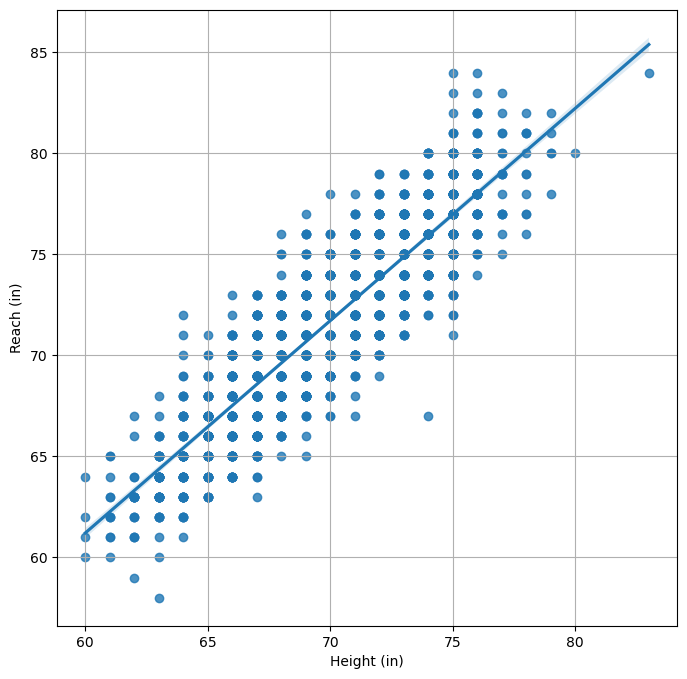

In [469]:
plt.figure(figsize=(8,8))
sns.regplot(data = fighters_df, x = 'Height', y = 'Reach')
plt.xlabel('Height (in)')
plt.ylabel('Reach (in)')
plt.grid()
plt.show()

In [470]:
fighters_df[['Height', 'Reach']].corr()

,Height,Reach
Height,1.000000,0.886611
Reach,0.886611,1.000000


From the plot above, we can also see a clear linear relationship with few outliers. We could impute the missing `Height` and `Reach` values by fitting a linear regression on the data and identifying the slope and intercept of the line.

In [471]:
# Linear regression on non null height and reach values.
compare = fighters_df[['Reach', 'Height']].dropna()
slope, intercept, _, _, _ = linregress(compare['Height'], compare['Reach'])
print(slope, intercept)

1.0515197071635316 -1.8885942799782924


In [472]:
fighters_df['Reach'].fillna(round(slope*fighters_df['Height'] + intercept), inplace = True)
fighters_df['Height'].fillna(round((fighters_df['Reach'] - intercept)/slope), inplace = True)

Next we will look at the `Stance` column. Doing a `.value_counts()` shows that 'Orthodox' is by far the most significant class. We will therefore assume that the null values also fall into the Orthodox class. Whilst this naturally will result in some errors, we can assume the majority will be correct. We will also take the opportunity to relabel the 'Open Stance' and 'Sideways' stances also as 'Orthodox'. These minority classes tell only how close a fighter's feet are together rather than which foot is forward. 

In [473]:
fighters_df['Stance'].value_counts()

Stance
Orthodox       2422
Southpaw        546
Switch          176
Open Stance       7
Sideways          3
Name: count, dtype: int64

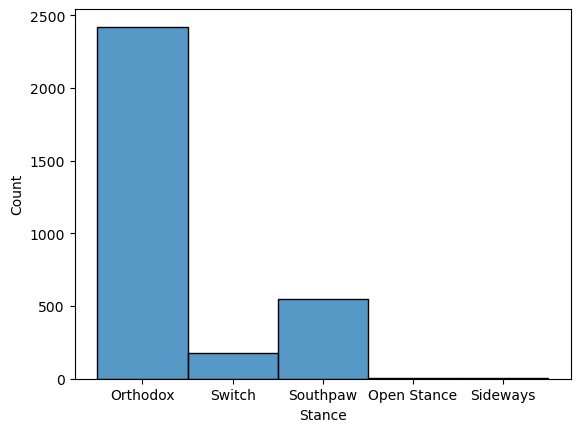

In [474]:
sns.histplot(data = fighters_df, x = 'Stance')
plt.show()

In [475]:
# Fill NaNs with 'Orthodox'
fighters_df['Stance'].fillna('Orthodox', inplace=True)

# Relabel minority classes as 'Orthodox'
fighters_df['Stance'].replace({
    'Open Stance':'Orthodox',
    'Sideways':'Orthodox'
    }, inplace=True)

fighters_df['Stance'].value_counts()

Stance
Orthodox    3311
Southpaw     546
Switch       176
Name: count, dtype: int64

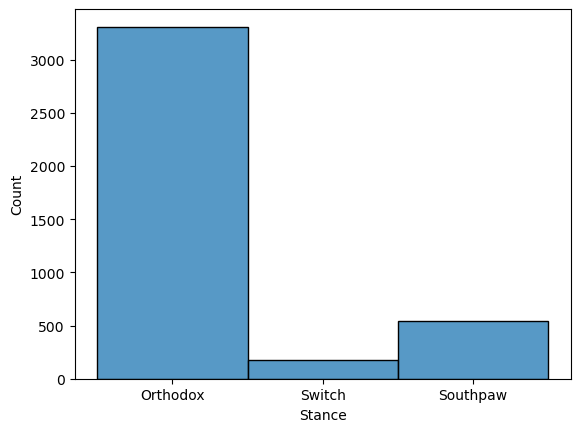

In [476]:
sns.histplot(data = fighters_df, x = 'Stance')
plt.show()

From the `basic_checks` output below, we can see that there are still 21.7% of rows which contain null values. We will estimate the remainder of these values as the median of the opponent stats. Looking at the scatter plots below, we can see that this is a valid assumption as we can identify a clear correlation between a fighter's reach, height and DOB with the medians of those of their opponents. 

We will also drop the `Weight` column as this value is only a current value and differs with each fight so it is not useful.

In [477]:
ds_tools.basic_checks(fighters_df)

==================== SHAPE ====================
Rows: 4033
Columns: 7

==================== NULLS ====================
Nulls: 1536 null values
Rows with nulls: 874, 21.67% of the DataFrame

Nulls percentage (by column):
Height    8.455%
Weight    2.182%
Reach     8.455%
DOB      18.993%
Total nulls percentage: 5.44%

================== DUPLICATES =================
Duplicates: 0 rows, 0.0% of the DataFrame


============= NUMERICAL DATA TYPES ============
Height           float64
Weight           float64
Reach            float64
DOB       datetime64[ns]
dtype: object

=========== CATEGORICAL DATA TYPES ============
Name      object
Stance    object
Link      object
dtype: object


In [478]:
fighters_df.drop(columns='Weight', inplace=True)

In [479]:
# Join fights_df with fighters_df on 'R_link' and 'B_link'
r_fights = fights_df.merge(fighters_df, how='left', left_on='B_link', right_on='Link')
b_fights = fights_df.merge(fighters_df, how='left', left_on='R_link', right_on='Link')


# Calculate medians for each fighter
r_medians = r_fights[['R_link', 'Height', 'Reach', 'DOB']]
b_medians = b_fights[['B_link', 'Height', 'Reach', 'DOB']]

r_medians.rename(columns={
    'R_link': 'Link',
    'Height':'Opp_Height',
    'Reach':'Opp_Reach',
    'DOB':'Opp_DOB'
    }, inplace=True)
b_medians.rename(columns={
    'B_link': 'Link',
    'Height':'Opp_Height',
    'Reach':'Opp_Reach',
    'DOB':'Opp_DOB'
    }, inplace=True)

r_medians = r_medians.merge(fighters_df[['Link', 'Height', 'Reach','DOB']], how='left', on='Link')
b_medians = b_medians.merge(fighters_df[['Link', 'Height', 'Reach','DOB']], how='left', on='Link')

# Combine r_medians and b_medians
medians = pd.concat([r_medians, b_medians])

# Median of opponents for each fighter
# df.groupby() has issues dealing with NaT values so these will be dropped and dates will be dealt with separately.

# Separate date cols and find medians
non_dob_medians = medians.groupby('Link')[['Opp_Height', 'Opp_Reach', 'Height', 'Reach']].median()

# Drop NaT values
medians_dob = medians.dropna(subset=['Opp_DOB', 'DOB'])

# Find date medians
dob_medians = medians_dob.groupby('Link')[['Opp_DOB', 'DOB']].median()

# Join back on to the dataframe
medians = pd.concat([non_dob_medians, dob_medians], axis=1)
medians.reset_index(level='Link', inplace=True)

C:\Users\triha\AppData\Local\Temp\ipykernel_12256\2916379530.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_medians.rename(columns={
C:\Users\triha\AppData\Local\Temp\ipykernel_12256\2916379530.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_medians.rename(columns={


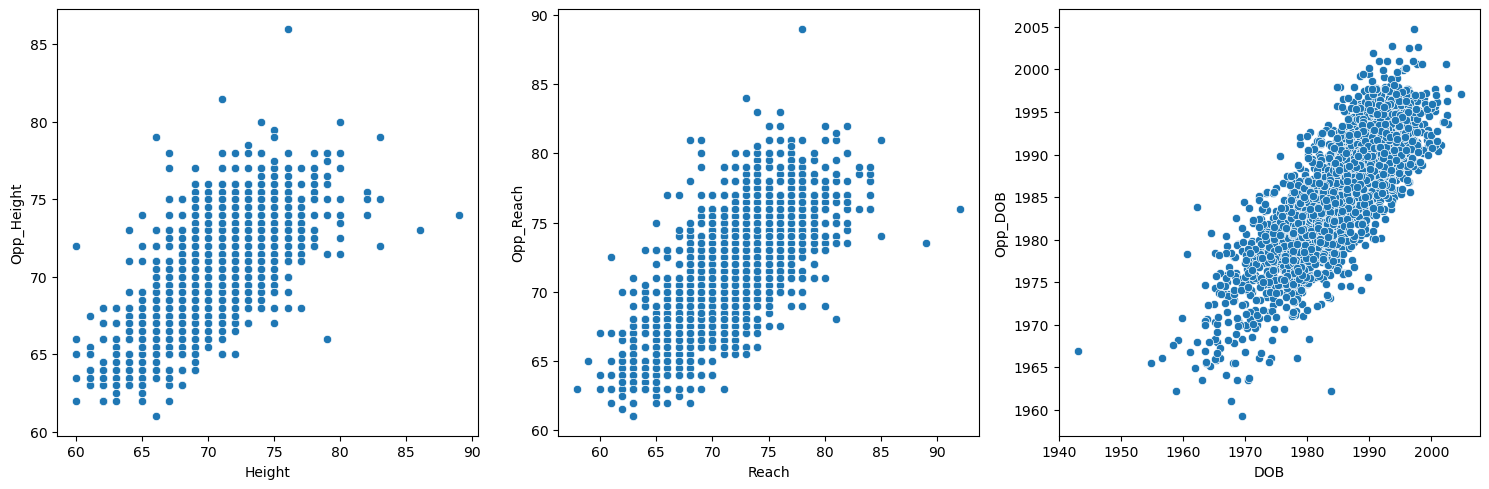

In [480]:
# Comparing fighter stats with medians of opponents - Clear correlation can be seen
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  
for i, col in enumerate(['Height', 'Reach', 'DOB']):
    sns.scatterplot(data=medians, x=col, y='Opp_'+col, ax=axs[i])

plt.tight_layout()
plt.show()


In [481]:
medians.drop(columns = ['Height', 'Reach', 'DOB'], inplace = True)

In [482]:
medians.rename(columns={col:col.split('_')[1] if '_' in col else col for col in medians.columns}, inplace = True)

In [483]:
# Set 'Link' column as index in both dataframes
fighters_df.set_index('Link', inplace=True)
medians.set_index('Link', inplace=True)

# Fill null values in fighters_df with corresponding values from medians
fighters_df = fighters_df.fillna(medians)

# Reset index
fighters_df.reset_index(inplace=True)

fighters_df

,Link,Name,Height,Reach,Stance,DOB
0,http://ufcstats.com/fighter-details/93fe7332d16c6ad9,Tom Aaron,NaN,NaN,Orthodox,1978-07-13
1,http://ufcstats.com/fighter-details/15df64c02b6b0fde,Danny Abbadi,71.0,73.0,Orthodox,1983-07-03
2,http://ufcstats.com/fighter-details/59a9d6dac61c2540,Nariman Abbasov,68.0,66.0,Orthodox,1994-02-01
3,http://ufcstats.com/fighter-details/b361180739bed4b0,David Abbott,72.0,74.0,Switch,NaT
4,http://ufcstats.com/fighter-details/3329d692aea4dc28,Hamdy Abdelwahab,74.0,72.0,Southpaw,1993-01-22
...,...,...,...,...,...,...
4028,http://ufcstats.com/fighter-details/9094a881a7513de3,Kevin Syler,69.0,71.0,Switch,1993-07-29
4029,http://ufcstats.com/fighter-details/58a36b4ccf5dc30e,Leo Sylvest,71.0,73.0,Orthodox,1973-09-03
4030,http://ufcstats.com/fighter-details/87b7df65c30008c4,Tony Sylvester,73.0,75.0,Southpaw,1978-01-27
4031,http://ufcstats.com/fighter-details/2a542ee8a8b83559,Tim Sylvia,80.0,80.0,Orthodox,1976-03-05


In [484]:
ds_tools.basic_checks(fighters_df)

==================== SHAPE ====================
Rows: 4033
Columns: 6

==================== NULLS ====================
Nulls: 1172 null values
Rows with nulls: 843, 20.9% of the DataFrame

Nulls percentage (by column):
Height    5.033%
Reach     5.033%
DOB      18.993%
Total nulls percentage: 4.84%

================== DUPLICATES =================
Duplicates: 0 rows, 0.0% of the DataFrame


============= NUMERICAL DATA TYPES ============
Height           float64
Reach            float64
DOB       datetime64[ns]
dtype: object

=========== CATEGORICAL DATA TYPES ============
Link      object
Name      object
Stance    object
dtype: object


In [485]:
fighters_df

,Link,Name,Height,Reach,Stance,DOB
0,http://ufcstats.com/fighter-details/93fe7332d16c6ad9,Tom Aaron,NaN,NaN,Orthodox,1978-07-13
1,http://ufcstats.com/fighter-details/15df64c02b6b0fde,Danny Abbadi,71.0,73.0,Orthodox,1983-07-03
2,http://ufcstats.com/fighter-details/59a9d6dac61c2540,Nariman Abbasov,68.0,66.0,Orthodox,1994-02-01
3,http://ufcstats.com/fighter-details/b361180739bed4b0,David Abbott,72.0,74.0,Switch,NaT
4,http://ufcstats.com/fighter-details/3329d692aea4dc28,Hamdy Abdelwahab,74.0,72.0,Southpaw,1993-01-22
...,...,...,...,...,...,...
4028,http://ufcstats.com/fighter-details/9094a881a7513de3,Kevin Syler,69.0,71.0,Switch,1993-07-29
4029,http://ufcstats.com/fighter-details/58a36b4ccf5dc30e,Leo Sylvest,71.0,73.0,Orthodox,1973-09-03
4030,http://ufcstats.com/fighter-details/87b7df65c30008c4,Tony Sylvester,73.0,75.0,Southpaw,1978-01-27
4031,http://ufcstats.com/fighter-details/2a542ee8a8b83559,Tim Sylvia,80.0,80.0,Orthodox,1976-03-05


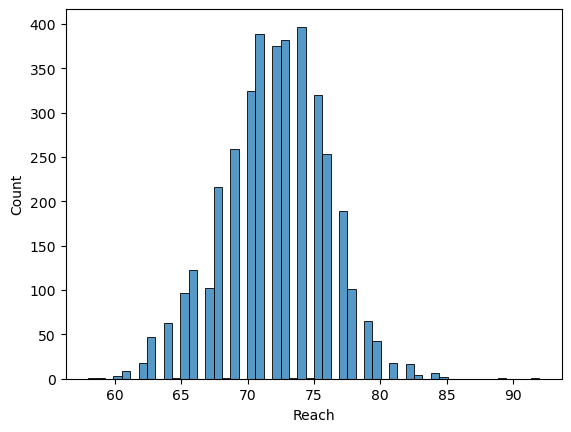

In [486]:
sns.histplot(data = fighters_df, x='Reach')
plt.show()

Running `basic_checks` again, we can see that the majority of nulls have been eliminated. We will see how the remainder affect the joined dataset before we deal with them. 

Joining the data on the fighter names is not possible because, as shown below, there are a number of different fighters with the same name. However, the URLs to the fighter pages are unique, so we will use this as the key. We will do a left join onto the `fights_df` dataframe. This will preserve the rows of `fights_df` and populate the fighter stats using the fighter URLs.

In [487]:
fighters_df[fighters_df['Name'].duplicated(keep=False)]

,Link,Name,Height,Reach,Stance,DOB
901,http://ufcstats.com/fighter-details/c8661e204c66f325,Mike Davis,NaN,NaN,Orthodox,NaT
906,http://ufcstats.com/fighter-details/fb3e61720be4690c,Mike Davis,72.0,72.0,Orthodox,1992-10-07
1330,http://ufcstats.com/fighter-details/0778f94eb5d588a5,Joey Gomez,70.0,73.0,Orthodox,1986-07-21
1332,http://ufcstats.com/fighter-details/3a28e1e641366308,Joey Gomez,70.0,71.0,Orthodox,1989-08-29
1505,http://ufcstats.com/fighter-details/3641a0d117e9bc6c,Tony Johnson,74.0,76.0,Orthodox,1983-05-02
1513,http://ufcstats.com/fighter-details/a45bab49951a45cd,Tony Johnson,73.0,75.0,Orthodox,NaT
2689,http://ufcstats.com/fighter-details/d52ef694108f8235,Michael McDonald,71.0,73.0,Orthodox,1965-02-06
2691,http://ufcstats.com/fighter-details/d0314416a7f26527,Michael McDonald,69.0,70.0,Orthodox,1991-01-15
3811,http://ufcstats.com/fighter-details/9211aae062b799d6,Jean Silva,66.0,68.0,Orthodox,1977-10-08
3825,http://ufcstats.com/fighter-details/294aa73dbf37d281,Bruno Silva,64.0,65.0,Orthodox,1990-03-16


In [488]:
# Join red fighter data on fighter URL - Drop redundant 'Name' and 'Link' columns after joining
ufc_df = fights_df.merge(fighters_df, how='left', left_on='R_link', right_on='Link').drop(columns = ['Name','Link'])

# Add a 'R_' prefix to joined columns to denote that the stats belong to the red fighter
to_prefix = {col:'R_'+col for col in ufc_df.columns[-4:]}
ufc_df.rename(columns=to_prefix, inplace=True)

# Repeat for blue fighter
ufc_df = ufc_df.merge(fighters_df, how='left', left_on='B_link', right_on='Link').drop(columns = ['Name', 'Link'])
to_prefix = {col:'B_'+col for col in ufc_df.columns[-4:]}
ufc_df.rename(columns=to_prefix, inplace=True)

# Drop redundant columns
ufc_df.drop(columns=['Fight_link'], inplace=True)
ufc_df.head()

,Date,Winner,Method,Weight_class,W_round,W_round_time,R_fighter,B_fighter,R_KD,B_KD,R_sub_att,B_sub_att,R_rev,B_rev,R_ctrl,B_ctrl,R_link,B_link,N_Rounds,Fight_time,R_total_str_att,R_total_str_land,B_total_str_att,B_total_str_land,R_TD_att,R_TD_land,B_TD_att,B_TD_land,R_sig_str_att,R_sig_str_land,B_sig_str_att,B_sig_str_land,R_sig_str_head_att,R_sig_str_head_land,B_sig_str_head_att,B_sig_str_head_land,R_sig_str_body_att,R_sig_str_body_land,B_sig_str_body_att,B_sig_str_body_land,R_sig_str_leg_att,R_sig_str_leg_land,B_sig_str_leg_att,B_sig_str_leg_land,R_sig_str_dist_att,R_sig_str_dist_land,B_sig_str_dist_att,B_sig_str_dist_land,R_sig_str_clinch_att,R_sig_str_clinch_land,B_sig_str_clinch_att,B_sig_str_clinch_land,R_sig_str_ground_att,R_sig_str_ground_land,B_sig_str_ground_att,B_sig_str_ground_land,R_Height,R_Reach,R_Stance,R_DOB,B_Height,B_Reach,B_Stance,B_DOB
0,2010-12-04,B,Dec,Lightweight,3,300,Tom Aaron,Matt Ricehouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://ufcstats.com/fighter-details/93fe7332d16c6ad9,http://ufcstats.com/fighter-details/343d57cde1a14338,3,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Orthodox,1978-07-13,70.0,72.0,Orthodox,1987-03-11
1,2010-05-15,R,Sub,Catch Weight,1,56,Tom Aaron,Eric Steenberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://ufcstats.com/fighter-details/93fe7332d16c6ad9,http://ufcstats.com/fighter-details/377bc9dc0b2745f9,3,356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Orthodox,1978-07-13,NaN,NaN,Orthodox,1983-06-22
2,2006-09-23,R,Dec,Lightweight,3,300,Jorge Gurgel,Danny Abbadi,0.0,0.0,1.0,0.0,0.0,0.0,123.0,110.0,http://ufcstats.com/fighter-details/04d5718ed2661e8c,http://ufcstats.com/fighter-details/15df64c02b6b0fde,3,1200,208.0,101.0,173.0,79.0,7.0,1.0,0.0,0.0,159.0,58.0,146.0,56.0,149.0,49.0,137.0,49.0,7.0,6.0,9.0,7.0,3.0,3.0,0.0,0.0,128.0,44.0,122.0,41.0,18.0,12.0,20.0,12.0,13.0,2.0,4.0,3.0,67.0,69.0,Orthodox,1977-01-25,71.0,73.0,Orthodox,1983-07-03
3,2006-06-24,R,Sub,Middleweight,1,176,Kalib Starnes,Danny Abbadi,0.0,0.0,1.0,0.0,0.0,0.0,101.0,0.0,http://ufcstats.com/fighter-details/c8136ab8aa32c974,http://ufcstats.com/fighter-details/15df64c02b6b0fde,3,476,33.0,25.0,12.0,6.0,2.0,1.0,0.0,0.0,29.0,21.0,9.0,3.0,17.0,10.0,8.0,2.0,12.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,5.0,1.0,5.0,5.0,4.0,2.0,19.0,14.0,0.0,0.0,75.0,74.0,Orthodox,1975-01-06,71.0,73.0,Orthodox,1983-07-03
4,2022-09-06,R,Dec,Lightweight,3,300,Ismael Bonfim,Nariman Abbasov,1.0,0.0,0.0,0.0,0.0,0.0,6.0,21.0,http://ufcstats.com/fighter-details/eb393afdbe3293d5,http://ufcstats.com/fighter-details/59a9d6dac61c2540,3,1200,158.0,85.0,225.0,45.0,3.0,1.0,2.0,0.0,158.0,85.0,225.0,45.0,133.0,63.0,197.0,26.0,21.0,19.0,11.0,8.0,4.0,3.0,17.0,11.0,144.0,77.0,224.0,45.0,7.0,5.0,1.0,0.0,7.0,3.0,0.0,0.0,68.0,71.0,Orthodox,1995-12-28,68.0,66.0,Orthodox,1994-02-01


We can drop the fighter columns as we will now use the fighter URLs to uniquely identify each fighter.

In [489]:
ufc_df.drop(columns=['R_fighter', 'B_fighter'], inplace = True)

Once again, running `basic_checks`, we can see that nulls have been reduced to just 8.91% of the dataframe. Most of these are in the striking stats where some were unavailable. These columns will be dropped once feature engineering has been completed so we'll leave these in the dataframe for now. 

However there are a small number of nulls still in height, reach and DOB stats. We will try to estimate these values.

In [490]:
ds_tools.basic_checks(ufc_df)

==================== SHAPE ====================
Rows: 9449
Columns: 62

==================== NULLS ====================
Nulls: 16301 null values
Rows with nulls: 842, 8.91% of the DataFrame

Nulls percentage (by column):
R_KD                    3.683%
B_KD                    3.683%
R_sub_att               3.683%
B_sub_att               3.683%
R_rev                   3.683%
B_rev                   3.683%
R_ctrl                  3.683%
B_ctrl                  3.683%
R_total_str_att         3.683%
R_total_str_land        3.683%
B_total_str_att         3.683%
B_total_str_land        3.683%
R_TD_att                3.683%
R_TD_land               3.683%
B_TD_att                3.683%
B_TD_land               3.683%
R_sig_str_att           3.683%
R_sig_str_land          3.683%
B_sig_str_att           3.683%
B_sig_str_land          3.683%
R_sig_str_head_att      3.683%
R_sig_str_head_land     3.683%
B_sig_str_head_att      3.683%
B_sig_str_head_land     3.683%
R_sig_str_body_att      3.683%
R_si

Firstly, we will convert the DOB columns to age by subtracting from the fight date, this may give us some better insight into how we might estimate the missing values.

In [491]:
ufc_df['R_age'] = (ufc_df['Date'] - ufc_df['R_DOB']).dt.days // 365
ufc_df['B_age'] = (ufc_df['Date'] - ufc_df['B_DOB']).dt.days // 365

ufc_df.drop(columns=['R_DOB', 'B_DOB'], inplace = True)

We may consider simply estimating with the statistics of the fighter's opponent. However, as we can see from the plots below, there is virtually no discernable correlation between the ages of a fighter and their opponent.

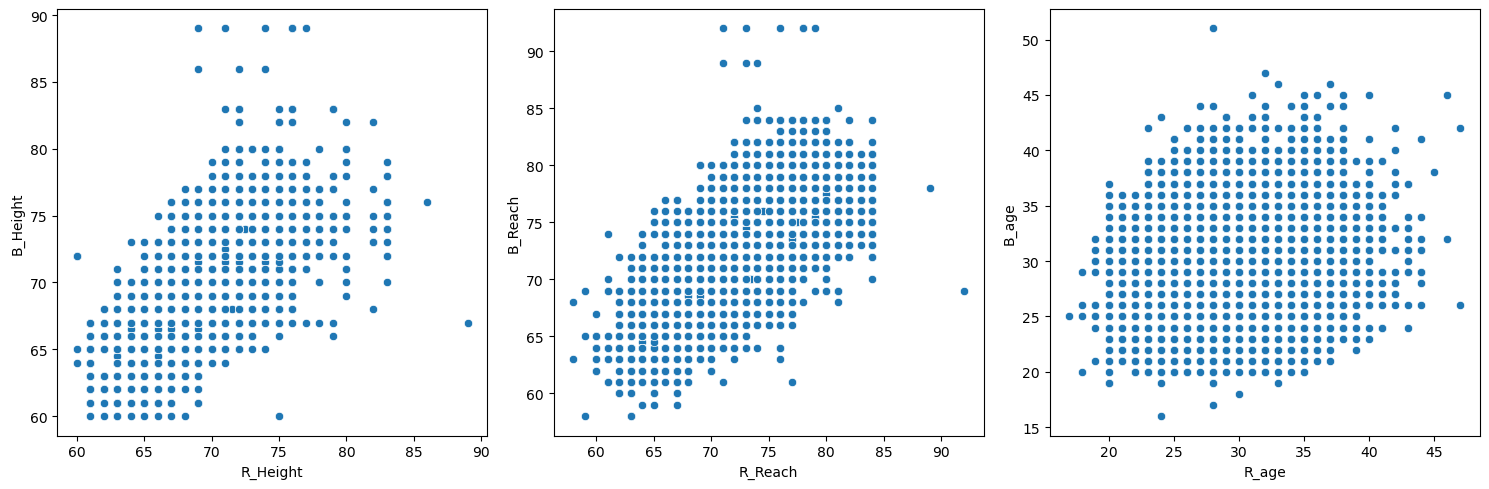

In [492]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  
for i, col in enumerate(['Height', 'Reach', 'age']):
    sns.scatterplot(data=ufc_df, x='R_'+col, y='B_'+col, ax=axs[i])

plt.tight_layout()
plt.show()

Whilst there is some correlation in the height and reach statistics, there are 23 rows where those statistics are missing from both fighters, so using opponent values would not be possible for these.

In [493]:
ufc_df[['R_Height', 'B_Height']].isna().all(axis=1).sum()

23

Looking at the distributions of ages, heights, and reaches, we can see a resemblance to a normal distribution in the ages, with most fighters aged between 25 and 35. We will fill in the missing age values with the median of all fighters.

The distributions are less clear in the heights and reaches. This may be due to the difference in weight classes.

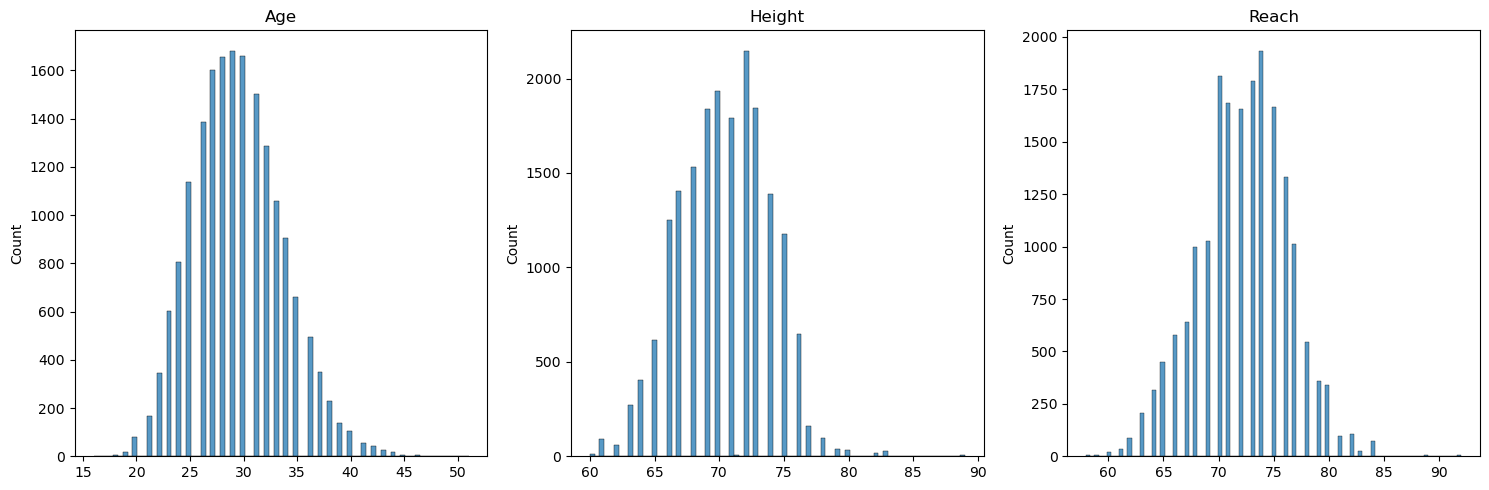

In [494]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Age plot
sns.histplot(pd.concat([ufc_df['R_age'], ufc_df['B_age']]), ax=axs[0])
axs[0].set_title('Age')

# Height plot
sns.histplot(pd.concat([ufc_df['R_Height'], ufc_df['B_Height']]), ax=axs[1])
axs[1].set_title('Height')

# Reach plot
sns.histplot(pd.concat([ufc_df['R_Reach'], ufc_df['B_Reach']]), ax=axs[2])
axs[2].set_title('Reach')

plt.tight_layout()
plt.show()

In [495]:
# Concatenating 'R_age' and 'B_age' series and calculating median
median_age = pd.concat([ufc_df['R_age'], ufc_df['B_age']]).median()

# Filling NaNs in 'R_age' and 'B_age' with median_age
ufc_df['R_age'] = ufc_df['R_age'].fillna(median_age)
ufc_df['B_age'] = ufc_df['B_age'].fillna(median_age)

Plotting the distributions of height and reach by weight class we can see a somewhat clearer pattern. Higher weight classes will naturally have higher reach and height stats. 

Interstingly we can see that in most cases reach tends to be greater than height despite the fact that the general population has a roughly equal height and reach. Having a longer reach is an advantage in combat sports, thus people with this advantage are slightly more likely to be better fighters and therefore become professionals.

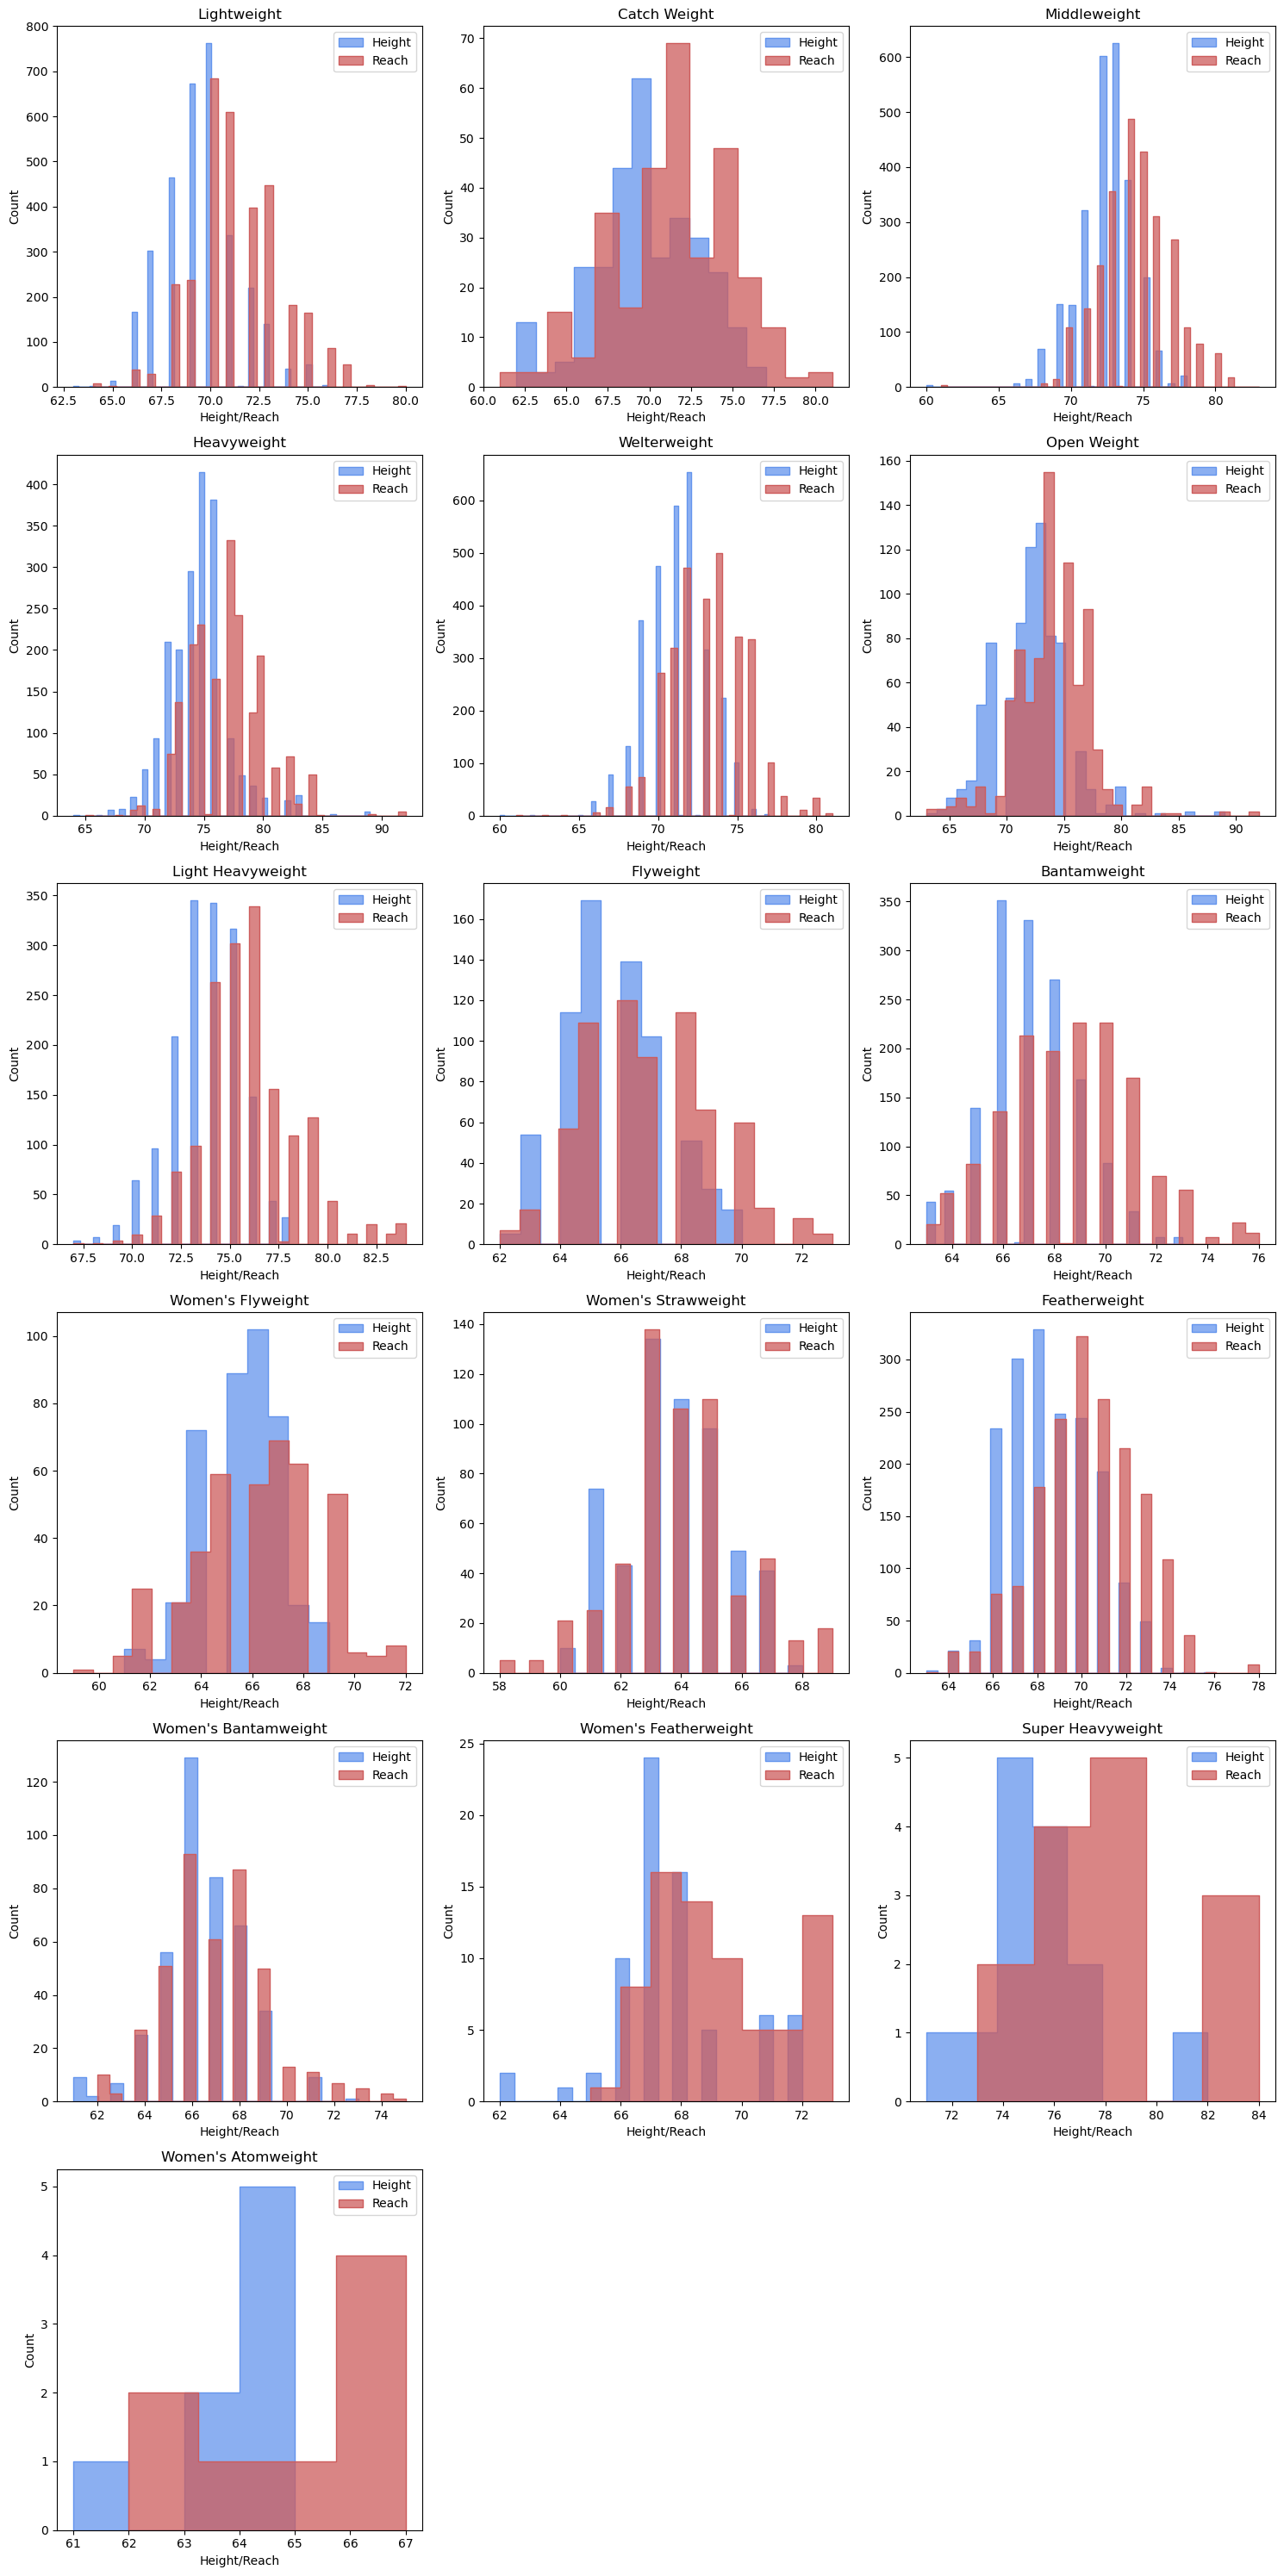

In [496]:
# Create a list of unique weight classes
weight_classes = ufc_df['Weight_class'].unique()

# Calculate the number of rows needed for our subplots
n_rows = np.ceil(len(weight_classes) / 3).astype(int)

# Create a figure and axes with enough subplots
fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))

# Flatten the axes, so we can easily iterate over them
axs = axs.flatten()

# Iterate over weight classes and axes
for weight_class, ax in zip(weight_classes, axs):
    # Concatenate heights from both red and blue corners for the current weight class
    combined_heights = pd.concat([ufc_df.loc[ufc_df['Weight_class'] == weight_class, 'R_Height'],
                                  ufc_df.loc[ufc_df['Weight_class'] == weight_class, 'B_Height']])
    
    # Concatenate reaches from both red and blue corners for the current weight class
    combined_reaches = pd.concat([ufc_df.loc[ufc_df['Weight_class'] == weight_class, 'R_Reach'],
                                  ufc_df.loc[ufc_df['Weight_class'] == weight_class, 'B_Reach']])
    
    # Create histogram for heights
    sns.histplot(combined_heights, ax=ax, color='cornflowerblue', label='Height', kde=False, element='step')
    
    # Create histogram for reaches
    sns.histplot(combined_reaches, ax=ax, color='indianred', label='Reach', kde=False, element='step', common_norm=False)
    
    # Set the title of the current subplot to the name of the weight class
    ax.set_title(weight_class)
    ax.set_xlabel('Height/Reach')
    ax.legend(loc='upper right')

# If there are more axes than weight classes, delete the extra axes
if len(weight_classes) < len(axs):
    for ax in axs[len(weight_classes):]:
        fig.delaxes(ax)

# Make the layout tight
plt.tight_layout()

# Show the plot
plt.show()


We will use the median height and reach values for each weight class to estimate the remaining null values.

In [497]:
# Iterate over weight classes
for weight_class in weight_classes:
    # Filter the dataframe for the current weight class
    weight_class_df = ufc_df[ufc_df['Weight_class'] == weight_class]
    
    # Concatenate heights from both red and blue corners for the current weight class
    combined_heights = pd.concat([weight_class_df['R_Height'], weight_class_df['B_Height']])
    
    # Concatenate reaches from both red and blue corners for the current weight class
    combined_reaches = pd.concat([weight_class_df['R_Reach'], weight_class_df['B_Reach']])
    
    # Calculate the median of the heights and reaches
    median_height = combined_heights.median()
    median_reach = combined_reaches.median()
    
    # Fill the NaN values in R_Height, B_Height, R_Reach, and B_Reach with the corresponding medians
    ufc_df.loc[ufc_df['Weight_class'] == weight_class, 'R_Height'] = weight_class_df['R_Height'].fillna(median_height)
    ufc_df.loc[ufc_df['Weight_class'] == weight_class, 'B_Height'] = weight_class_df['B_Height'].fillna(median_height)
    ufc_df.loc[ufc_df['Weight_class'] == weight_class, 'R_Reach'] = weight_class_df['R_Reach'].fillna(median_reach)
    ufc_df.loc[ufc_df['Weight_class'] == weight_class, 'B_Reach'] = weight_class_df['B_Reach'].fillna(median_reach)

We can confirm that the only remaining nulls are in the striking stats.

In [498]:
ds_tools.basic_checks(ufc_df)

==================== SHAPE ====================
Rows: 9449
Columns: 62

==================== NULLS ====================
Nulls: 15312 null values
Rows with nulls: 348, 3.68% of the DataFrame

Nulls percentage (by column):
R_KD                    3.683%
B_KD                    3.683%
R_sub_att               3.683%
B_sub_att               3.683%
R_rev                   3.683%
B_rev                   3.683%
R_ctrl                  3.683%
B_ctrl                  3.683%
R_total_str_att         3.683%
R_total_str_land        3.683%
B_total_str_att         3.683%
B_total_str_land        3.683%
R_TD_att                3.683%
R_TD_land               3.683%
B_TD_att                3.683%
B_TD_land               3.683%
R_sig_str_att           3.683%
R_sig_str_land          3.683%
B_sig_str_att           3.683%
B_sig_str_land          3.683%
R_sig_str_head_att      3.683%
R_sig_str_head_land     3.683%
B_sig_str_head_att      3.683%
B_sig_str_head_land     3.683%
R_sig_str_body_att      3.683%
R_si

In [499]:
ufc_df.to_csv('data/outputs/cleaned_and_processed.csv')